## Project: Building A Handwritten Digits Classifier

* explore why image classification is a hard task
* observe the limitations of traditional machine learning models for image classification
* train, test, and improve a few different deep neural networks for image classification

In this project, deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. 

**Why is image classification a hard task?**

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

**Why is deep learning effective in image classification?**

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process.

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the numpy.reshape() function

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print(digits.data.shape)

(1797, 64)


In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [5]:
df = load_digits(as_frame=True)

In [6]:
features = df.data
target = pd.Series(df.target)

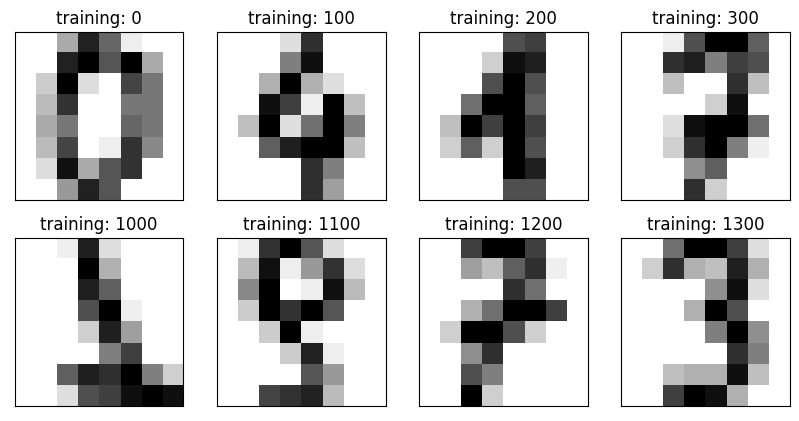

In [7]:
image_rows = [0, 100, 200, 300, 1000, 1100, 1200, 1300]

fig = plt.figure(figsize=(10,5))

i = 0
for img in image_rows:
    image = features.iloc[img]
    np_image = image.values
    np_image = np_image.reshape(8,8)
    ax = fig.add_subplot(2,4, i +1)
    ax.set_title("training: %i"%img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(np_image, cmap= "gray_r")
    i += 1

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [12]:
features = pd.DataFrame(df.data)
target = pd.Series(df.target)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.33,
                                                    random_state=42)

In [58]:

def train(X, y, k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    return clf
    
def test(X1, y1, clf):
    predictions = clf.predict(X1)
    return accuracy_score(y1, predictions)



def cross_validate(k):
    old_accuracies = []
    fold_accuracies=[]
    kf = KFold(n_splits=4, random_state=42)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train(train_features, train_target, k)
        overall_accuracy = test(test_features, test_target, model)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies       

In [56]:
# Perform 4-fold cross validation using the train and test functions
#  created above
data = load_digits()
target = pd.Series(data['target'])
data = pd.DataFrame(data['data'])

 
cross_validate(4)

[0.9533333333333334, 0.955456570155902, 0.9821826280623608, 0.9688195991091314]

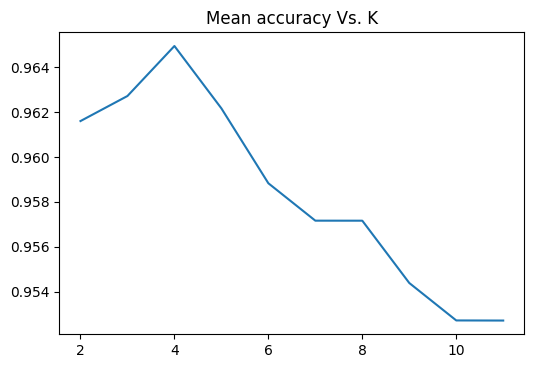

In [59]:
klist = [2,3,4,5,6,7,8,9,10,11]

k_accuracy = []

for k in klist:
    k_values = cross_validate(k)
    k_mean = np.mean(k_values)
    k_accuracy.append(k_mean)


plt.plot(klist, k_accuracy)
plt.title("Mean accuracy Vs. K")
plt.show()

In [61]:
from sklearn.neural_network import MLPClassifier

In [63]:
shuffled_index = np.random.permutation(data.index)
shuffled_data = data.loc[shuffled_index]
shuffled_labels = target.loc[shuffled_index]

mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(target)]

In [64]:
neurons = [8, 16, 32, 64, 128, 256]
accuracies = []

for i in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(i,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    nn_accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(nn_accuracy)
    print(nn_accuracy)
    
print(accuracies)

0.9121245828698554
0.9566184649610678
0.9688542825361512
0.9721913236929922
0.9755283648498332
0.9810901001112347
[0.9121245828698554, 0.9566184649610678, 0.9688542825361512, 0.9721913236929922, 0.9755283648498332, 0.9810901001112347]


## K-fold Cross Validation Neural Network with 2 Hidden Layers (64 Neurons)

In [66]:
accuracies = []

# 4-fold cross validation
kf = KFold(n_splits=4, random_state=42)

for train_index, test_index in kf.split(data):
    train_features, test_features = data.loc[train_index], data.loc[test_index]
    train_target, test_target = target.loc[train_index], target.loc[test_index]
    
    # Instantiate the Model
    mlp = MLPClassifier(hidden_layer_sizes=(64,64), activation='logistic')
    
    # Fit the model
    mlp.fit(train_features, train_target)
    nn_predictions = mlp.predict(test_features)
    nn_accuracy = accuracy_score(test_target, nn_predictions)
    accuracies.append(nn_accuracy)
    print(nn_accuracy)
 

0.9444444444444444
0.933184855233853
0.9665924276169265
0.9287305122494433


### 6-fold Cross Validation Neural Network with 3 Hidden Layers (10,10,10 Neurons)

In [68]:
accuracies = []

# 4-fold cross validation
kf = KFold(n_splits=6, random_state=42)

for train_index, test_index in kf.split(data):
    train_features, test_features = data.loc[train_index], data.loc[test_index]
    train_target, test_target = target.loc[train_index], target.loc[test_index]
    
    # Instantiate the Model
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='logistic', max_iter=1000)
    
    # Fit the model
    mlp.fit(train_features, train_target)
    nn_predictions = mlp.predict(test_features)
    nn_accuracy = accuracy_score(test_target, nn_predictions)
    accuracies.append(nn_accuracy)
    print(nn_accuracy)

0.8733333333333333
0.82
0.8233333333333334
0.8963210702341137
0.903010033444816
0.7959866220735786
